In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import sys
import scipy
import matplotlib.dates as mdates
from datetime import datetime
sys.path.append('..')
from read_data_functions import *
from plot_functions import *
from calculations import *

In [10]:
def read_APS(path, parent_path, hour):
    parentPath = os.path.abspath(parent_path)
    if parentPath not in sys.path:
        sys.path.insert(0, parentPath)

    files = os.listdir(path)
    data_dict = {}

    for file in files:
        if 'APS' in file:
            name = file.split('.')[0]
            with open(os.path.join(path, file), 'r', encoding='ISO-8859-1') as f:
                df = pd.read_table(f, sep = ',', skiprows = 6, header = None, index_col = 0)
            
            df = df.T

            df['Time'] = df[['Date', 'Start Time']].agg(' '.join, axis=1)

            df['Time'] = format_timestamps(df['Time'], '%m/%d/%y %H:%M:%S', "%d/%m/%Y %H:%M:%S")
            df['Time'] = df['Time'] + pd.Timedelta(hours = hour)

            data_dict[name] = df

    return data_dict

In [4]:
parent_path = '../../../../'
path = 'L:/PG-Nanoteknologi/PROJEKTER/2024 Laura og Nan/Lund/'

SMPS = read_SMPS(path, parent_path, [0, 0])
OPS_APS = read_OPS(path, parent_path, ',')

In [3]:
colors = ['k', 'tab:blue', 'tab:orange', 'tab:green', 'red', 'tab:purple', 'tab:brown', 
              'tab:pink', 'magenta', 'tab:olive', 'tab:cyan', 'navy', 'aquamarine', 'darkolivegreen',
              'darkred', 'darkmagenta', 'chocolate', 'gold']

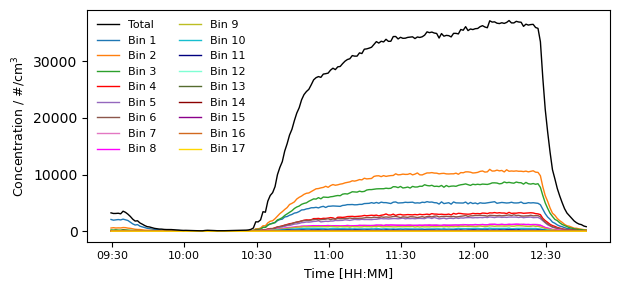

In [4]:
fig, ax = plt.subplots(figsize = (6.3, 3))

OPS_single_timeseries(ax, OPS_APS['Exp1'], colors)

fig.tight_layout()
fig.savefig('OPS_total_exp1.png', dpi = 600)
plt.show()

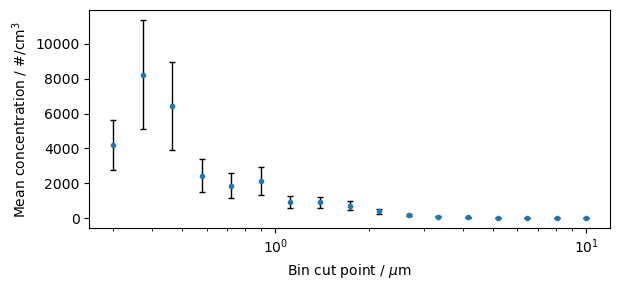

In [5]:
bin_cut_point = [0.300, 0.374, 0.465, 0.579, 0.721, 0.897, 1.117, 1.391, 1.732, 2.156, 2.685, 3.343, 4.162, 5.182, 6.451, 8.031, 10.000]

start_time = pd.to_datetime('2024-10-16 10:26:00')
end_time = pd.to_datetime('2024-10-16 12:26:00')

time = pd.to_datetime(OPS_APS['Exp1']['Time']).round('60s')
time_filter = (time >= start_time) & (time <= end_time)
filtered_time = time[time_filter]

mean = []
std = []
for key in OPS_APS['Exp1'].keys()[1:18]:
    conc = np.array(OPS_APS['Exp1'][key])
    filtered_conc = conc[time_filter]
    bin_mean = filtered_conc.mean()
    bin_std = filtered_conc.std()
    mean.append(bin_mean)
    std.append(bin_std)

fig, ax = plt.subplots(figsize = (6.3, 3))

ax.errorbar(bin_cut_point, mean, std, fmt='.', ecolor='k', elinewidth=1, capsize=2, capthick=1)

ax.set(xlabel='Bin cut point / $\mu$m', ylabel='Mean concentration / #/cm$^{3}$', xscale='log')

fig.tight_layout()
fig.savefig('OPS_mean_exp1.png', dpi = 600)
plt.show()


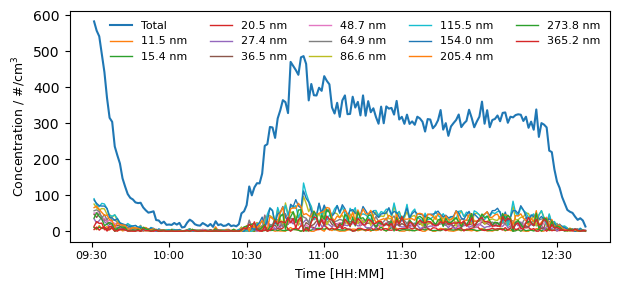

In [6]:
fig, ax = plt.subplots(figsize = (6.3, 3))

NanoScan_single_timeseries(ax, SMPS['2024-10-16_NanoScan'], 5)

fig.tight_layout()
fig.savefig('NanoScan_total_exp1.png', dpi = 600)
plt.show()

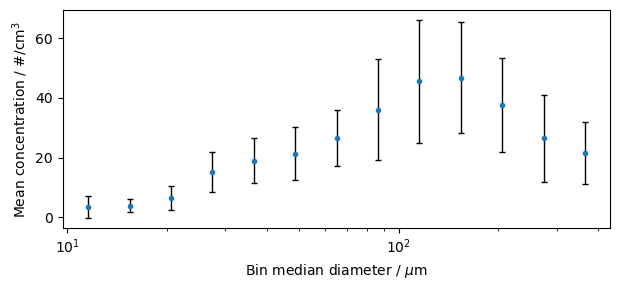

In [7]:
bin_mean_diameter = []

start_time = pd.to_datetime('2024-10-16 10:26:00')
end_time = pd.to_datetime('2024-10-16 12:26:00')

time = pd.to_datetime(SMPS['2024-10-16_NanoScan']['Time']).round('60s')
time_filter = (time >= start_time) & (time <= end_time)
filtered_time = time[time_filter]

mean = []
std = []
for key in SMPS['2024-10-16_NanoScan'].keys()[3:16]:
    bin_mean_diameter.append(float(key))
    conc = np.array(SMPS['2024-10-16_NanoScan'][key])
    filtered_conc = conc[time_filter]
    bin_mean = filtered_conc.mean()
    bin_std = filtered_conc.std()
    mean.append(bin_mean)
    std.append(bin_std)

fig, ax = plt.subplots(figsize = (6.3, 3))

ax.errorbar(bin_mean_diameter, mean, std, fmt='.', ecolor='k', elinewidth=1, capsize=2, capthick=1)

ax.set(xlabel='Bin median diameter / $\mu$m', ylabel='Mean concentration / #/cm$^{3}$', xscale='log')

fig.tight_layout()
fig.savefig('NanoScan_mean_exp1.png', dpi = 600)
plt.show()